# Grouplib

## Defining a Group

### What is a Group?
Let concider group G with operation * $(G,*)$ and <b>a</b>, <b>b</b> and <b>c</b> are elements in the group; Then:-
    
- <b>Closure</b> : 
 - For all elements in G the result of binary operation (a * b) is also in group element set.
- <b>Associativity</b>:
 - For all a, b and c in G, $(a * b) * c = a * (b * c)$.
- <b>Identity element</b>:
 - There exists an element <b>e</b> in G such that, for every element a in G, the equation 
$e * a = a * e = a$
- <b>Inverse element</b>:
 - For each a in G, there exists an element b in G, commonly denoted $a^{-1}$ , such that 
$a * b = b * a = e$
where e is the identity element.

More on Mathamatical defenination of a Group go to https://en.wikipedia.org/wiki/Group_(mathematics)

### Constructiong groups via Grouplib
#### Cyclic Groups


In [1]:
from Grouplib import *
import seaborn as sns
import matplotlib.pyplot as plt
C3 = Group.cyclic(3)
print(C3)

New group element set are [0, 1, 2]
New group order 3
Group Name:	UnnamedGroup
Group Reference:	None
Group Order:	3
Abeailan group:	True
solvable : feature will available in a later version
Multiplication table raw data:-
0  1  2
1  2  0
2  0  1

Element Lables:-
0    0
1    1
2    2
Name: 0, dtype: object
Multiplication table :-
   0  1  2
0  0  1  2
1  1  2  0
2  2  0  1



#### Create a Group object from list of python objects and a binary operation.

Group.from_definition(operation: callable, element_set: list, parse: callable)-> Group Object
- <b>operation: </b> The binary operation of the group.
- <b>element_set: </b> The group's elements list.
- <b>parse(optional): </b> The elements of the group label will be registered by output of this function.


The fuction will accept any python object. However, the when constarting the multiplication table it will by default it will the __str__() of the object. 
Sometimes the result of __str__() of a python object that means the same thing outputs difrrent strings such as complex(0,1) can be '1j', '0+1j' or '-0+1j' which falsly will be registered as different elements. That where the <b>parse</b> function option so the user make the python element labels unique; as for the python object <b>Complex()</b> the below <b>parse</b> function can be used:-


``
def parse_complex(com):
    def sign(x):
        return '+' if x >= 0 else '-'
    return '{}{}{}{}j'.format(sign(com.real), com.real, sign(com.imag), com.imag)
``



Example:-
Let concider Grup G with the element set {$1$, $-1$, $i$, $-i$} under multiplication.


New group element set are [(1+0j), (-1+0j), 1j, -1j]
New group order 4


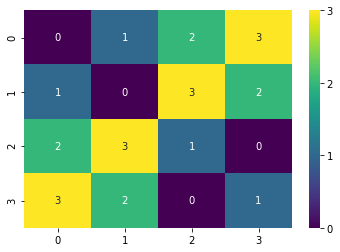

In [2]:
def parse_complex(com):
    def sign(x):
        return '+' if x >= 0 else '-'
    return '{}{}{}{}j'.format(sign(com.real), abs(com.real), sign(com.imag), abs(com.imag))

g = Group.from_definition(
    lambda x, y: x * y, 
    [complex(1, 0), complex(-1, 0), 
     complex(0, 1), complex(0, -1)],
    parse_complex)
g.plot()

### Direct and Semi-direct products

#### Direct product

Let there be gorup $(G,*)$ and $(H,•)$ then the direct product is

$(G,*)\times(H,•) = (g1 * g2 , h1 • h2)$

New group element set are [(1+0j), (-1+0j), 1j, -1j]
New group order 4
New group element set are [0, 1]
New group order 2
New group element set are [0, 1, 2, 3, 4, 5, 6, 7]
New group order 8


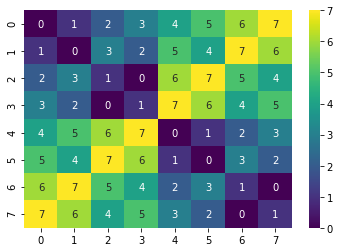

In [3]:
g = Group.from_definition(
    lambda x, y: x * y, 
    [complex(1, 0), complex(-1, 0), 
     complex(0, 1), complex(0, -1)],
    parse_complex)
C3 = Group.cyclic(2)

g_c3 = Group.direct_product(g, C3)
g_c3.plot()

#### Mappings

In [4]:
from mapping import *
m = Mapping.create([0, 1, 2, 3],[0, 3, 1, 2])
print(m)

Mapping properties:-
size	[5:5]
Injective	[True]
Surjective	[True]
Bijective	[True]
	Domain		Co-domain
	0	->	0
	1	->	3
	2	->	1
	3	->	2



#### Semidirect product
Let there be gorup $(G,*)$ and $(H,•)$ with mapping fuction $\phi:G\rightarrow H$ then the semidirect product is:-

$(G,*)\times(H,•) = (g1 * g2 ,\phi(h1 • h2) )$

In [6]:
phi = Mapping.create([0, 1, 2, 3],[0, 1, 1, 0])
semi_g_c3 = Group.semidirect_product(g, C3, phi)
semi_g_c3.plot()

False